## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('btc_2015_2024.csv')

### Basic Info of Dateset

In [3]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            3406 non-null   object 
 1   open            3406 non-null   float64
 2   high            3406 non-null   float64
 3   low             3406 non-null   float64
 4   close           3406 non-null   float64
 5   volume          3406 non-null   float64
 6   rsi_7           3406 non-null   float64
 7   rsi_14          3406 non-null   float64
 8   cci_7           3406 non-null   float64
 9   cci_14          3406 non-null   float64
 10  sma_50          3406 non-null   float64
 11  ema_50          3406 non-null   float64
 12  sma_100         3406 non-null   float64
 13  ema_100         3406 non-null   float64
 14  macd            3406 non-null   float64
 15  bollinger       3406 non-null   float64
 16  TrueRange       3406 non-null   float64
 17  atr_7           34

None

In [4]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
date              0
open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64


In [5]:
# Check for duplicates and remove them
duplicates = df.duplicated().sum()
print(f"\nRow Duplicated: {duplicates}")


Row Duplicated: 0


In [7]:
# Summary Statistics (Raw Prices)
print("\n--- Summary Statistics (Raw Data) ---")
print(df.describe())


--- Summary Statistics (Raw Data) ---
               open          high           low         close        volume  \
count   3406.000000   3406.000000   3406.000000   3406.000000  3.406000e+03   
mean   16492.625341  16877.348454  16080.656277  16509.984552  1.768334e+10   
std    17807.583857  18232.358118  17335.693731  17821.420606  1.932729e+10   
min      176.897003    211.731003    171.509995    178.102997  7.860650e+06   
25%     1429.217529   1478.617523   1423.639953   1462.137451  5.828465e+08   
50%     9027.951172   9216.074219   8808.764160   9044.665528  1.373602e+10   
75%    27266.747070  27790.822754  26836.931641  27292.176758  2.822673e+10   
max    73079.375000  73750.070313  71334.093750  73083.500000  3.509679e+11   

             rsi_7       rsi_14        cci_7       cci_14        sma_50  \
count  3406.000000  3406.000000  3406.000000  3406.000000   3406.000000   
mean     54.008653    53.734240    12.663339    18.526839  16036.270960   
std      18.499728    14

### Time-Series Trend Analysis

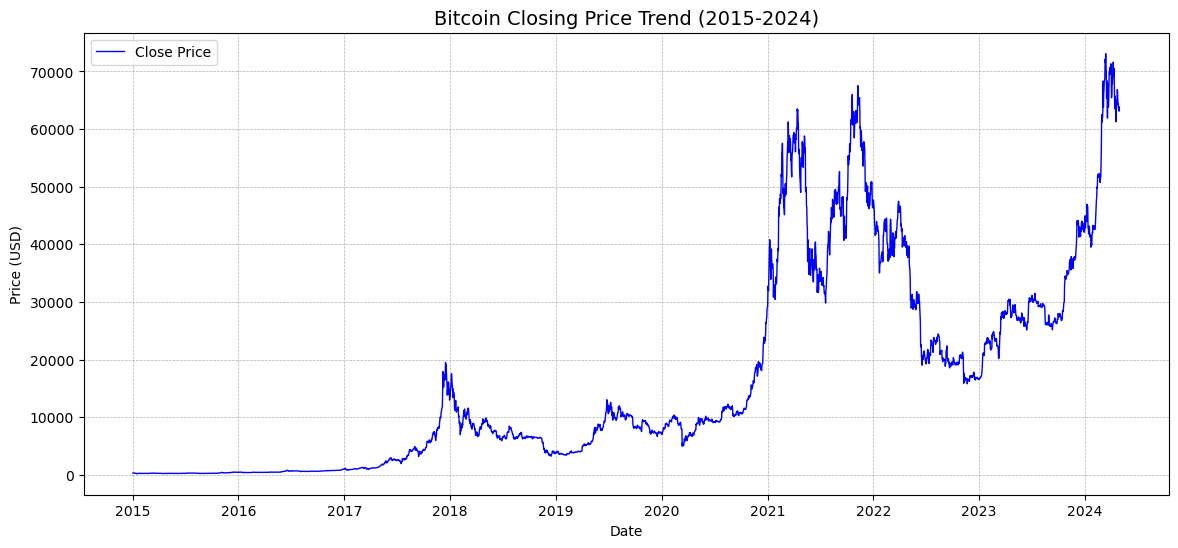

In [11]:
# Plot 1: Closing Price Trend
import matplotlib.dates as mdates

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# # Filter the DataFrame to include data from 2014 to 2020
# df_filtered = df[(df['date'].dt.year >= 2014) & (df['date'].dt.year <= 2022)].copy()

# --- Plot 1: Closing Price Trend (2014-2020) ---
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['date'], df['close'], label='Close Price', color='blue', linewidth=1)

# Set the title with the updated date range
ax.set_title('Bitcoin Closing Price Trend (2015-2024)', fontsize=14)
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# --- Format x-axis to label each year ---
# Set major ticks to be at the beginning of each year
ax.xaxis.set_major_locator(mdates.YearLocator())
# Format the major tick labels to show just the year (e.g., "2014")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [16]:
# Load the dataset
df_clean = pd.read_csv('BTC_Cleaned_Data.csv')

### Target Variable Analysis

Bullish Days: 1798 (53.24%)
Bearish Days: 1579 (46.76%)


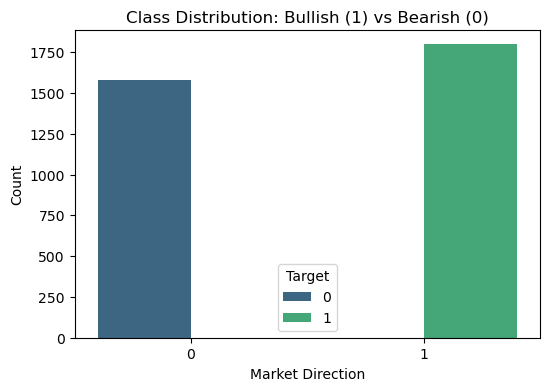

In [17]:
# Plot 3: Target Class Balance
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df_clean, hue = 'Target', palette='viridis')
plt.title('Class Distribution: Bullish (1) vs Bearish (0)', fontsize=12)
plt.xlabel('Market Direction')
plt.ylabel('Count')
# Add labels
bullish_count = df_clean['Target'].value_counts()[1]
bearish_count = df_clean['Target'].value_counts()[0]
print(f"Bullish Days: {bullish_count} ({(bullish_count/len(df))*100:.2f}%)")
print(f"Bearish Days: {bearish_count} ({(bearish_count/len(df))*100:.2f}%)")
plt.show()

### Market Stability Analysis

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


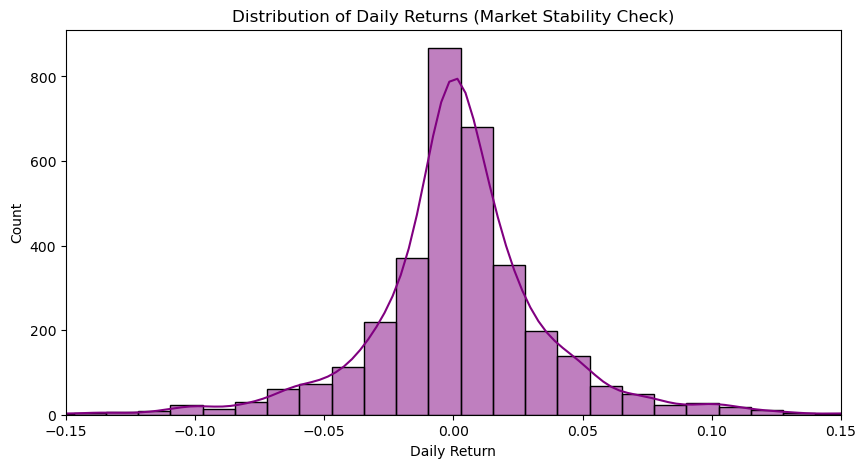

In [18]:
# Plot 4: Feature Distribution (Daily Returns)
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['Daily_Return'], bins=50, kde=True, color='purple') # type: ignore
plt.title('Distribution of Daily Returns (Market Stability Check)', fontsize=12)
plt.xlabel('Daily Return')
plt.xlim(-0.15, 0.15) # Zoom in to ignore extreme outlier wicks
plt.show()

### Bivariate Analysis

In [19]:
# Plot 5: Correlation Heatmap
# Select only numerical features relevant for correlation
corr_features = ['close', 'Volume USD', 'Daily_Return', 'High_Low_Spread', 'MA_7' ,'MA_30', 'Target']
corr_matrix = df_clean[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.show()

KeyError: "['Volume USD'] not in index"

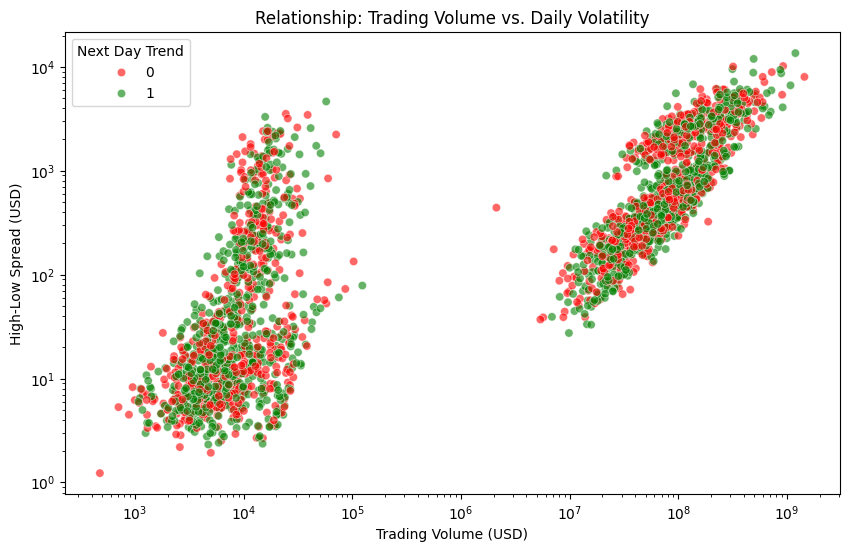

In [ ]:
# Plot 6: Volume vs Volatility Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume USD', y='High_Low_Spread', hue='Target', data=df_clean, alpha=0.6, palette={0: 'red', 1: 'green'})
plt.title('Relationship: Trading Volume vs. Daily Volatility', fontsize=12)
plt.xlabel('Trading Volume (USD)')
plt.ylabel('High-Low Spread (USD)')
plt.xscale('log') # Log scale because volume is massive
plt.yscale('log') # Log scale for spread to see patterns better
plt.legend(title='Next Day Trend')
plt.show()